# Uudiste pealkirjade analüüs

### Projekti kirjeldus

Siin töövihikus me analüüsime andmeid, mille me oleme varasemalt pythonis loonud.

Töövihikus me teeme 

1. <i> Sentiment </i> analüüsi. (Meil on andmed pealkirjade kohta, skaalal -1:1. -1 tähendab et tekst on negatiivse tekstiga, 1 tähendab et tegemist on positiivse tekstiga)

2. Populaarseimate sõnade analüüsi.

3. <i> Clickbait </i> analüüsi. (0 on madalaim arv. Maksimaalset piiri ei ole, sest see sõltub erinevatest teguritest. Võrdleme kahe saidi vahet) 

4. Pealkirjade "klassi" analüüs. Vaatame, mitmenda klassi tasemel on pealkirjad kirjutatud. 1 on kui esimese klassi lapse tasemele vastav tekst, 12 on kui 12da klassi tasemele vastav tekst. Hea tava on kirjutada tekste võimalikult lihtsal tasemel, et see oleks kõigi jaoks kaasahaaravam. 

#### Esimene osa - "sentiment" analüüs. 


In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df_CNN_sentiment = pd.read_csv("cnn_sentiment.csv")
df_FOX_sentiment = pd.read_csv("foxnews_sentiment.csv")

In [263]:
df_CNN_sentiment = df_CNN_sentiment.drop(0)

In [265]:
df_FOX_sentiment = df_FOX_sentiment.drop(0)

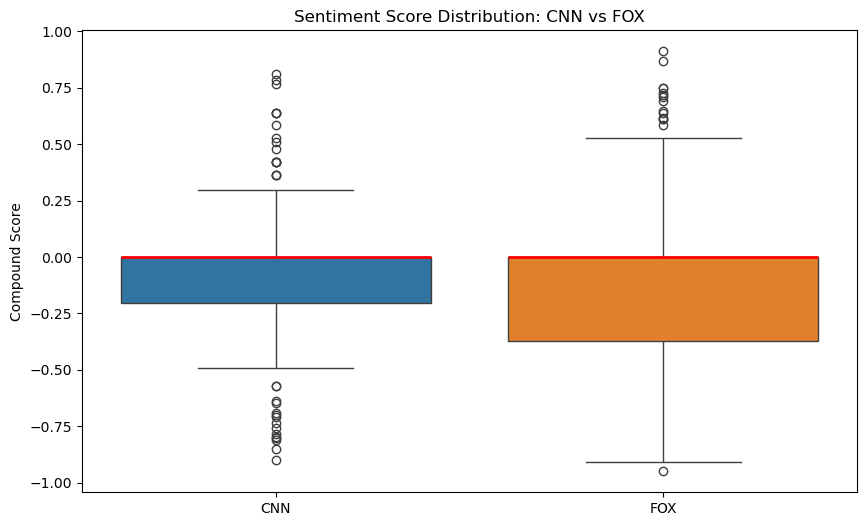

In [267]:
plt.figure(figsize=(10, 6))
sentiment_data = pd.concat([
    df_CNN_sentiment['compound'].rename('CNN'),
    df_FOX_sentiment['compound'].rename('FOX')
], axis=1)

# Add medianprops to make median line more visible
sns.boxplot(data=sentiment_data, medianprops=dict(color="red", linewidth=2))
plt.title('Sentiment Score Distribution: CNN vs FOX')
plt.ylabel('Compound Score')
plt.show()

##### Analüüsi tulemused
Siit andmetest selgub, et mediaanselt on Fox newsi pealkirjad negatiivsemad kui CNNi omad. 

#### Teine osa - populaarseimad sõnad

In [271]:
df_CNN_word_frequency = pd.read_csv("CNN_word_frequencies.csv")
df_FOX_word_frequency = pd.read_csv("FOX_word_frequencies.csv")

##### Võrdleme mõlemat veebilehte ja leiame populaarseimad sõnad.
Tulemusi kajastame sõnapilves (top 100 sõna) ja tulpgraafikus (top 20 sõna)

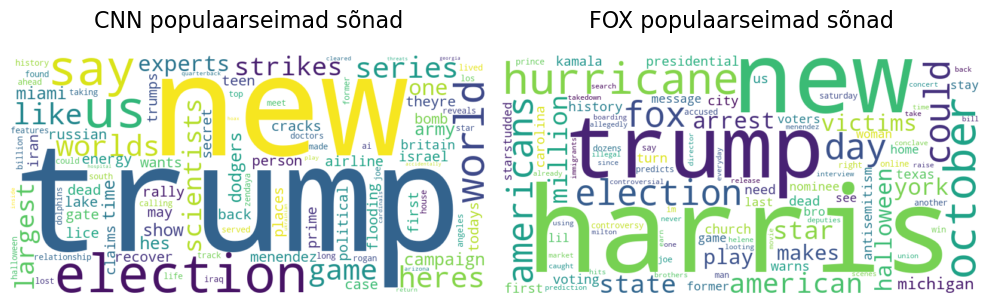

In [274]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Create dictionary from dataframes
cnn_dict = dict(zip(df_CNN_word_frequency['word'], df_CNN_word_frequency['count']))
fox_dict = dict(zip(df_FOX_word_frequency['word'], df_FOX_word_frequency['count']))

# Generate word clouds
wc_cnn = WordCloud(width=800, height=400, 
                  background_color='white',
                  max_words=100).generate_from_frequencies(cnn_dict)

wc_fox = WordCloud(width=800, height=400, 
                  background_color='white',
                  max_words=100).generate_from_frequencies(fox_dict)

# Plot CNN word cloud
ax1.imshow(wc_cnn, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('CNN populaarseimad sõnad', fontsize=16, pad=20)

# Plot FOX word cloud
ax2.imshow(wc_fox, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('FOX populaarseimad sõnad', fontsize=16, pad=20)

plt.tight_layout()
plt.show()

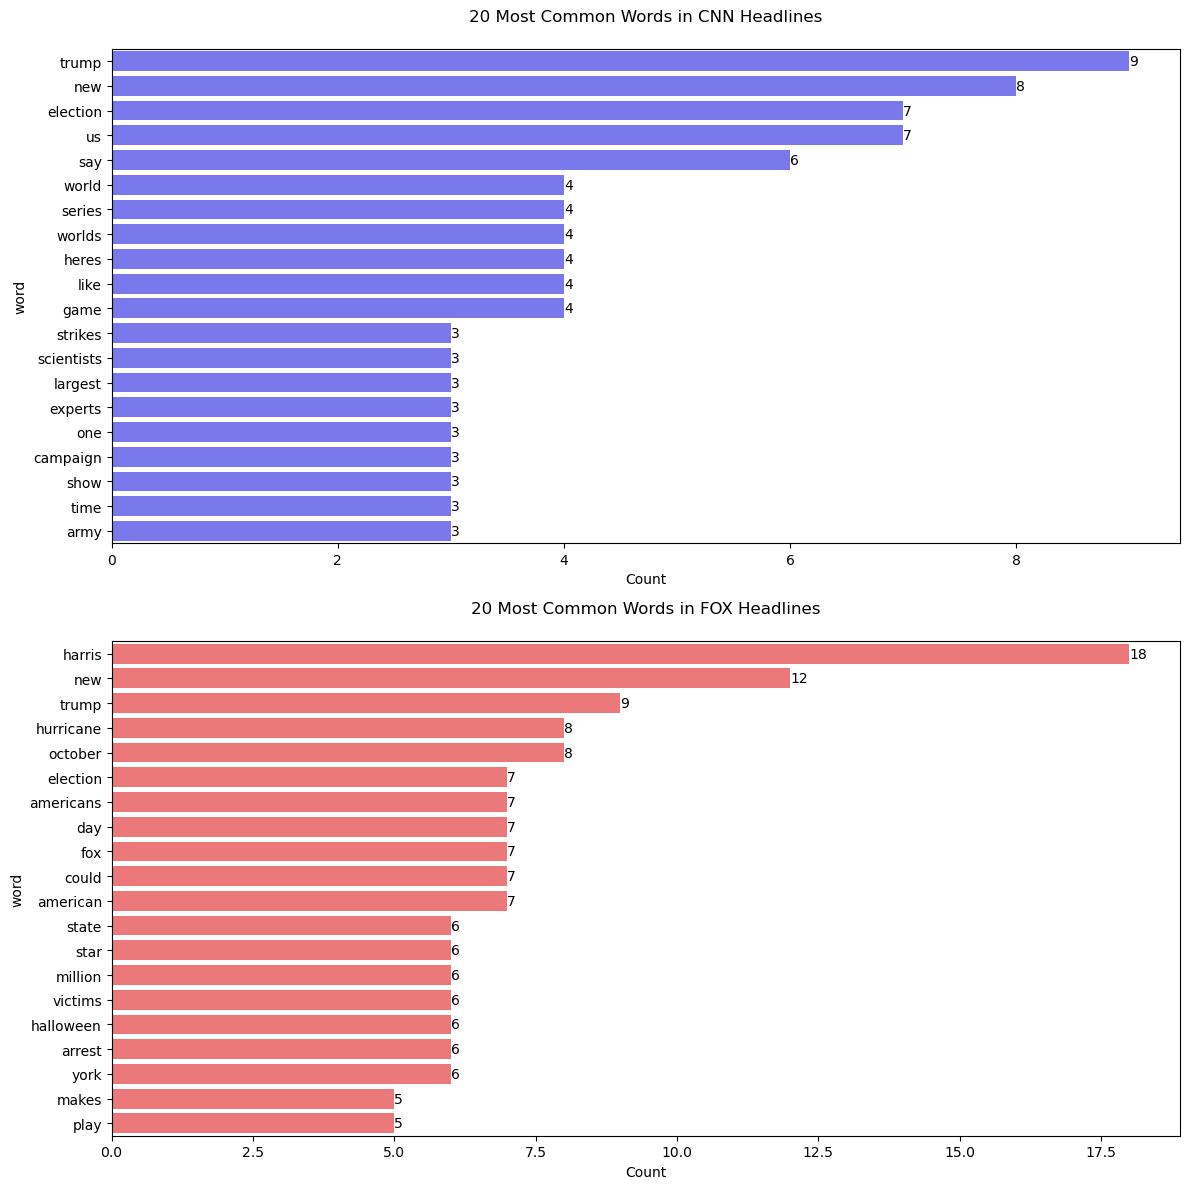

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get top 20 words from each dataset
cnn_top20 = df_CNN_word_frequency.nlargest(20, 'count')
fox_top20 = df_FOX_word_frequency.nlargest(20, 'count')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# CNN plot
sns.barplot(data=cnn_top20, y='word', x='count', ax=ax1, color='blue', alpha=0.6)
ax1.set_title('20 Most Common Words in CNN Headlines', pad=20)
ax1.set_xlabel('Count')

# FOX plot
sns.barplot(data=fox_top20, y='word', x='count', ax=ax2, color='red', alpha=0.6)
ax2.set_title('20 Most Common Words in FOX Headlines', pad=20)
ax2.set_xlabel('Count')

# Add count numbers at the end of each bar
for ax in [ax1, ax2]:
    for i in ax.containers:
        ax.bar_label(i)

plt.tight_layout()
plt.show()

##### Nüüd võrdleme kui paljudes pealkirjades proprotsionaalselt on 3 populaarsemat sõna esindatud.

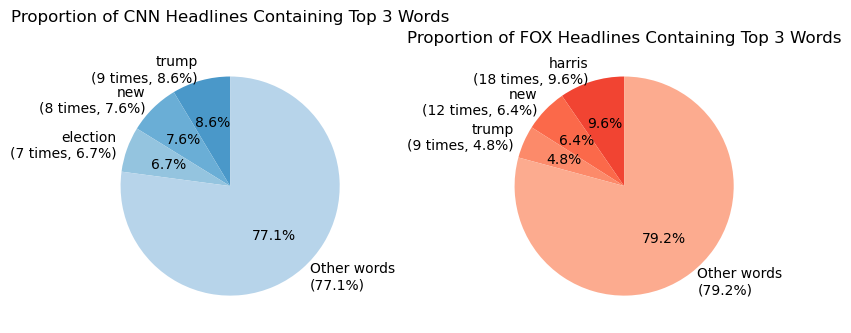

CNN Statistics:
Total headlines: 105
'trump' appears in 9 headlines (8.6%)
'new' appears in 8 headlines (7.6%)
'election' appears in 7 headlines (6.7%)

FOX Statistics:
Total headlines: 187
'harris' appears in 18 headlines (9.6%)
'new' appears in 12 headlines (6.4%)
'trump' appears in 9 headlines (4.8%)


In [279]:
# Get total number of headlines (length of original datasets)
total_cnn_headlines = len(df_CNN_sentiment)  # assuming this is your original headline datas
total_fox_headlines = len(df_FOX_sentiment)

# Get top 3 words and their counts
cnn_top3 = df_CNN_word_frequency.nlargest(3, 'count')
fox_top3 = df_FOX_word_frequency.nlargest(3, 'count')

# Calculate percentages
cnn_percentages = (cnn_top3['count'] / total_cnn_headlines * 100).round(1)
fox_percentages = (fox_top3['count'] / total_fox_headlines * 100).round(1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

# CNN Pie Chart
cnn_labels = [f"{word}\n({count} times, {pct}%)" 
              for word, count, pct in zip(cnn_top3['word'], cnn_top3['count'], cnn_percentages)]
cnn_others = 100 - sum(cnn_percentages)
cnn_sizes = list(cnn_percentages) + [cnn_others]
cnn_labels.append(f'Other words\n({cnn_others:.1f}%)')

ax1.pie(cnn_sizes, labels=cnn_labels, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Blues(np.linspace(0.6, 0.3, len(cnn_sizes))))
ax1.set_title('Proportion of CNN Headlines Containing Top 3 Words', pad=20)

# FOX Pie Chart
fox_labels = [f"{word}\n({count} times, {pct}%)" 
              for word, count, pct in zip(fox_top3['word'], fox_top3['count'], fox_percentages)]
fox_others = 100 - sum(fox_percentages)
fox_sizes = list(fox_percentages) + [fox_others]
fox_labels.append(f'Other words\n({fox_others:.1f}%)')

ax2.pie(fox_sizes, labels=fox_labels, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.Reds(np.linspace(0.6, 0.3, len(fox_sizes))))
ax2.set_title('Proportion of FOX Headlines Containing Top 3 Words', pad=5)

plt.tight_layout()
plt.show()

# Print the exact numbers
print("CNN Statistics:")
print(f"Total headlines: {total_cnn_headlines}")
for word, count, pct in zip(cnn_top3['word'], cnn_top3['count'], cnn_percentages):
    print(f"'{word}' appears in {count} headlines ({pct}%)")

print("\nFOX Statistics:")
print(f"Total headlines: {total_fox_headlines}")
for word, count, pct in zip(fox_top3['word'], fox_top3['count'], fox_percentages):
    print(f"'{word}' appears in {count} headlines ({pct}%)")

#### Analüüs

On näha et Fox ja CNN mõlemad räägivad u 9-10% pealkirjades enda nö vastaskandidaadist. Mis on aga huvitav, on tõsiasi, et CNN ei räägi enda kandidaadist, Kamala Harrisest, peaaegu üldse. See ei ole isegi top 10s. 

#### Kolmas' osa - võrdleme kui <i> clickbait</i>'i pealkiri on

In [283]:
df_CNN_clickbait= pd.read_csv("cnn_headlines_with_clickbait_analysis.csv")
CNN_Clickbait_Score = df_CNN_clickbait['clickbait_score'].median()

In [285]:
df_FOX_clickbait= pd.read_csv("FOX_headlines_with_clickbait_analysis.csv")
Fox_Clickbait_Score = df_FOX_clickbait['clickbait_score'].median()

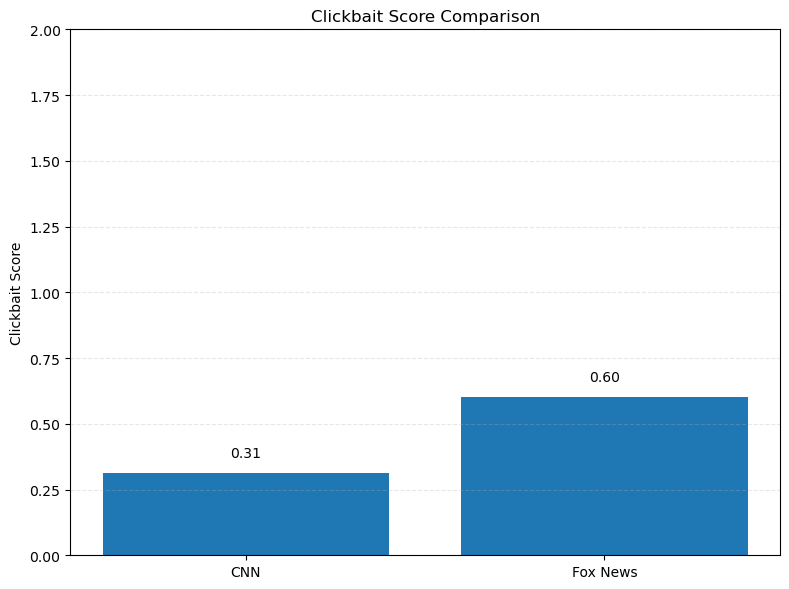

In [287]:
import matplotlib.pyplot as plt

# Data
scores = [CNN_Clickbait_Score, Fox_Clickbait_Score]
labels = ['CNN', 'Fox News']

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, scores)
plt.ylim(0, 2)  # Set y-axis limit
plt.title('Clickbait Score Comparison')
plt.ylabel('Clickbait Score')

# Add value labels on top of each bar
for i, score in enumerate(scores):
    plt.text(i, score + 0.05, f'{score:.2f}', 
             ha='center', va='bottom')

# Add legend
# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### Analüüs

Näeme, et Fox News on kõvasti <i> clicbaitim </i> kui CNN. 

#### Neljas osa - võrdleme mitmenda klassi tasemele on vastavad pealkirjad. 

In [291]:
df_CNN_grade_level = pd.read_csv("CNN_headlines_with_grades.csv")
df_FOX_grade_level = pd.read_csv("Fox_News_headlines_with_grades.csv")

In [293]:
df_CNN_grade_level.head()

,headline,grade
0,Israel strikes Iran,0.9
1,Georgia election,8.8
2,Hoax bomb threats,0.0
3,Russian strikes Ukrainian hospital,9.6
4,World Series,2.9


In [295]:
CNN_median_grade = df_CNN_grade_level["grade"].median()

In [297]:
Fox_median_grade = df_FOX_grade_level["grade"].median()

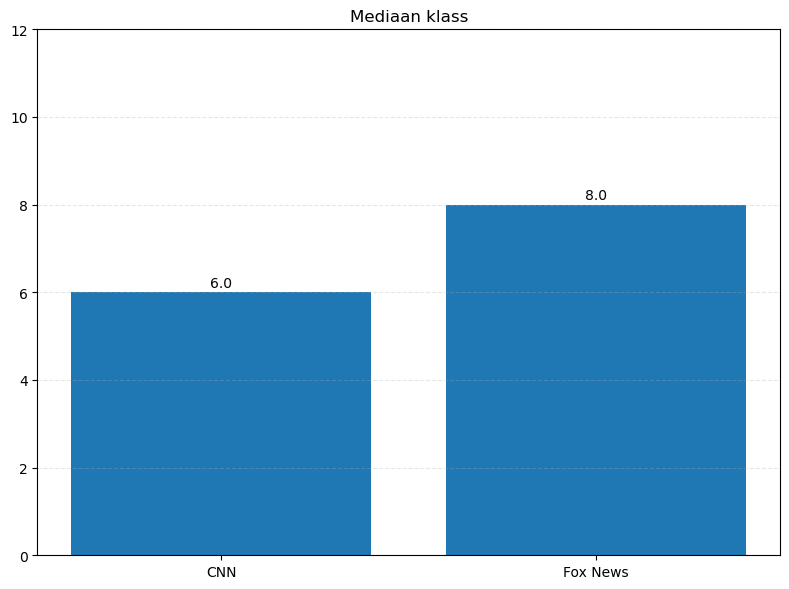

In [299]:
import matplotlib.pyplot as plt

# Data
grades = [CNN_median_grade, Fox_median_grade]
labels = ['CNN', 'Fox News']

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, grades)
plt.ylim(0, 12)  # Set y-axis limit
plt.title('Mediaan klass')
#plt.ylabel('Clickbait Score')

# Add value labels on top of each bar
for i, grade in enumerate(grades):
    plt.text(i, grade + 0.05, f'{grade:}', 
             ha='center', va='bottom')

# Add legend
# Customize grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### Analüüs

Üllataval kombel, on Fox Newsi pealkirjad vastavad kaheksanda klassi tasemele, CNNil aga kuuenda klassi tasemele. Tavaliselt üritatakse populistlikumates väljaannetes just luua "lihtsamaid" lauseid. See tulemus võib tulla sellest, et Fox News on clickbaitim ja emotsionaalsem oma tekstides, mis tähendab, et nad kirjutavad rohkem laetumaid lauseid, mis on ka pikemad ja kompleksemad. 